In [1]:
import sys
sys.path.append('../')

c:\Users\34699\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,image_name,label,path,train,label_id,image_id
0,n07720875_1.JPEG,bell pepper,images/bell pepper/n07720875_1.JPEG,True,0,0
1,n07720875_10.JPEG,bell pepper,images/bell pepper/n07720875_10.JPEG,True,0,1
2,n07720875_101.JPEG,bell pepper,images/bell pepper/n07720875_101.JPEG,True,0,2
3,n07720875_104.JPEG,bell pepper,images/bell pepper/n07720875_104.JPEG,True,0,3


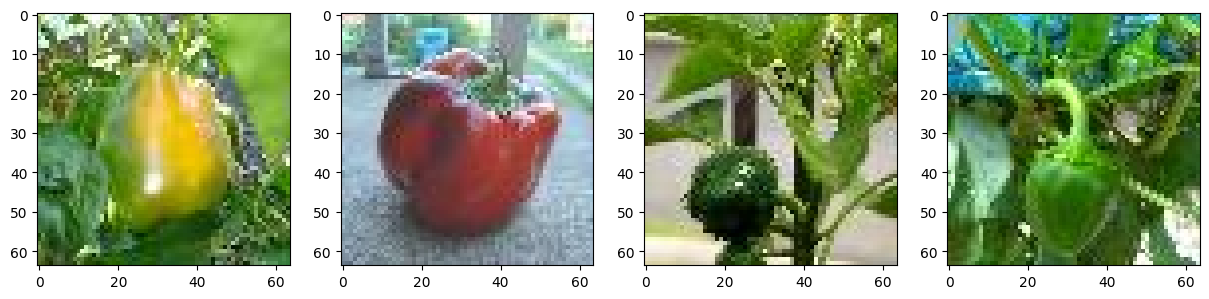

In [2]:
import cv2                      # Image Ops
import pandas as pd             # Other
import numpy as np              # Mat Opts
import matplotlib.pyplot as plt # Show Images

from utils.utils import load_images
from utils.features import load_features, save_features, extract_features
from utils.matching import minmin_retrival

image_meta, images = load_images(True) # True - Train Images
display(image_meta.head(4))

_, ax = plt.subplots(1, 4, figsize = (15, 6))
ax[0].imshow(images[0]);
ax[1].imshow(images[1]);
ax[2].imshow(images[2]);
ax[3].imshow(images[3]);

In [3]:
def hist_descriptor(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Calcular histogramas para los canales RGB y escala de grises
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # Normalizar los histogramas para tener una longitud fija
    hist_r /= hist_r.sum()
    hist_g /= hist_g.sum()
    hist_b /= hist_b.sum()
    hist_gray /= hist_gray.sum()

    # Concatenar los histogramas en un solo vector de descriptores
    descriptors = np.vstack((hist_r.T, hist_g.T, hist_b.T, hist_gray.T))
    return descriptors

# Convertir las imágenes a escala de grises y aplicar SIFT en el subconjunto de imágenes
descriptors, index = extract_features(hist_descriptor, images, min_features=3, progress = True)
print("Tamaño de  descriptores:", descriptors.shape[1])
print("Número de  descriptores:", descriptors.shape[0])
print("Número Máximo de Descriptores Por Imágen :", pd.value_counts(index).max())
print("Número Medio  de Descriptores Por Imágen :", pd.value_counts(index).mean().round(0).astype(int))
print("Número Mínimo de Descriptores Por Imágen :", pd.value_counts(index).min())

# Obligatorio Siempre Guardar
save_features(descriptors, index, image_meta, "HIST")

  0%|          | 0/700 [00:00<?, ?it/s]

100%|██████████| 700/700 [00:00<00:00, 9057.66it/s]


Tamaño de  descriptores: 256
Número de  descriptores: 2800
Número Máximo de Descriptores Por Imágen : 4
Número Medio  de Descriptores Por Imágen : 4
Número Mínimo de Descriptores Por Imágen : 4


In [4]:
desc_meta, descriptors = load_features("../features/HIST.csv") # Siempre Cargar
display(desc_meta.head())
display(descriptors.dtype)


,image_id,label_id
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


dtype('float32')

,image_name,label,path,train,label_id,image_id
0,n07720875_0.JPEG,bell pepper,images/bell pepper/n07720875_0.JPEG,False,0,0
1,n07720875_100.JPEG,bell pepper,images/bell pepper/n07720875_100.JPEG,False,0,1
2,n07720875_102.JPEG,bell pepper,images/bell pepper/n07720875_102.JPEG,False,0,2
3,n07720875_103.JPEG,bell pepper,images/bell pepper/n07720875_103.JPEG,False,0,3


,image_name,label,path,train,label_id,image_id
296,n01774750_169.JPEG,tarantula,images/tarantula/n01774750_169.JPEG,False,9,296
297,n01774750_170.JPEG,tarantula,images/tarantula/n01774750_170.JPEG,False,9,297
298,n01774750_173.JPEG,tarantula,images/tarantula/n01774750_173.JPEG,False,9,298
299,n01774750_179.JPEG,tarantula,images/tarantula/n01774750_179.JPEG,False,9,299


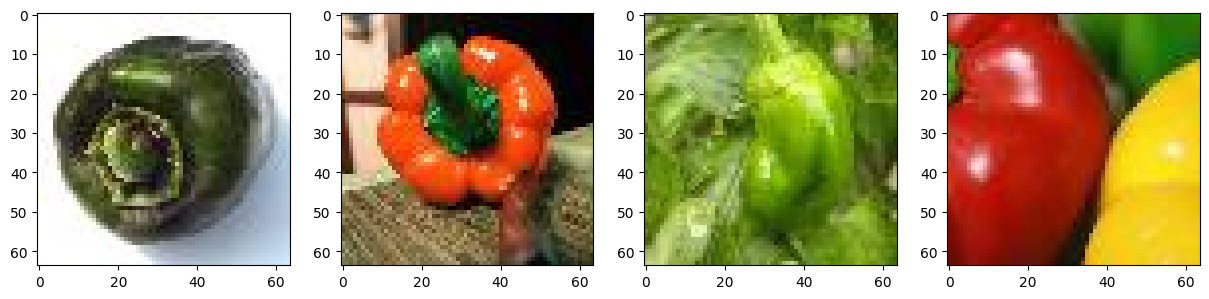

In [5]:
test_meta, test_images = load_images(False)

display(test_meta.head(4))
display(test_meta.tail(4))

_, ax = plt.subplots(1, 4, figsize = (15, 6))
ax[0].imshow(test_images[0]);
ax[1].imshow(test_images[1]);
ax[2].imshow(test_images[2]);
ax[3].imshow(test_images[3]);


[80, 211, 35, 194]


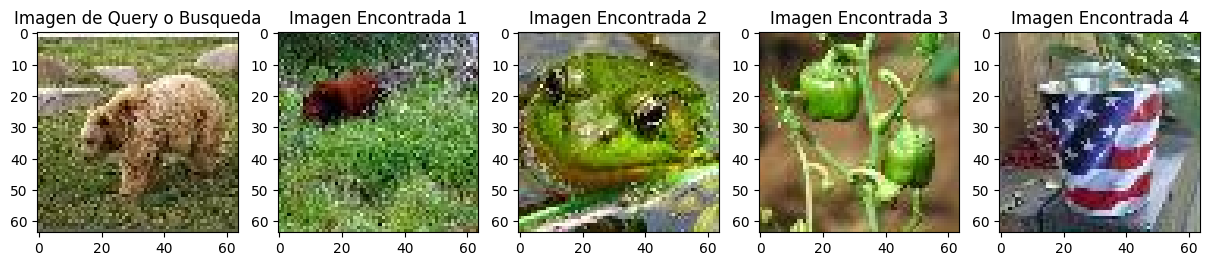

In [6]:
img = test_images[40]
descs = hist_descriptor(img)
ret_idx = minmin_retrival(descs, descriptors, desc_meta, best_k=4, distance_function=cv2.DIST_L2)
print(ret_idx)

_, ax = plt.subplots(1, 5,  figsize = (15, 6))

ax[0].imshow(img)
ax[0].set_title("Imagen de Query o Busqueda")
for i, img_id in enumerate(ret_idx, start = 1):
    ax[i].imshow(images[img_id])
    ax[i].set_title("Imagen Encontrada " + str(i));
